In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("0.24.2")

In [3]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## From Biological to Artificial Neurons 

## The Perceptron

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [8]:
y_pred  #The Perceptron is equivalent to a SGDClassifier with loss="perceptron", no regularization, and a constant learning rate equal to 1:

array([ True, False])

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

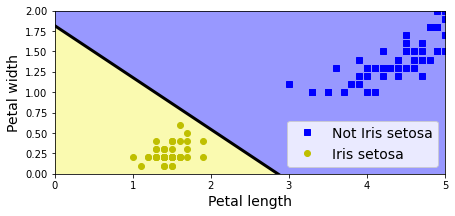

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

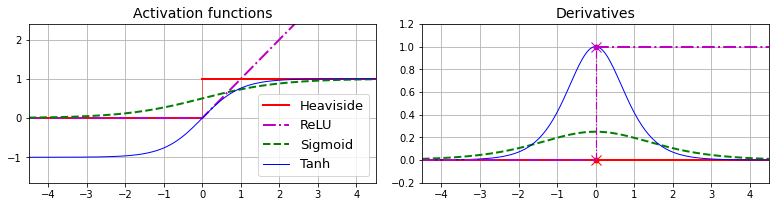

In [11]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [13]:
rmse

0.5053326657968465

## Classification MLPs

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

In [15]:
# https://playground.tensorflow.org/

# Implementing MLPs with Keras

## Building an Image Classifer Using the Sequential API

### Using Keras to load the dataset

In [16]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [17]:
X_train.shape

(55000, 28, 28)

In [18]:
X_train.dtype

dtype('uint8')

In [19]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

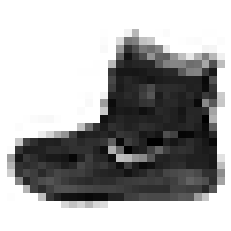

In [20]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [21]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [23]:
class_names[y_train[0]]

'Ankle boot'

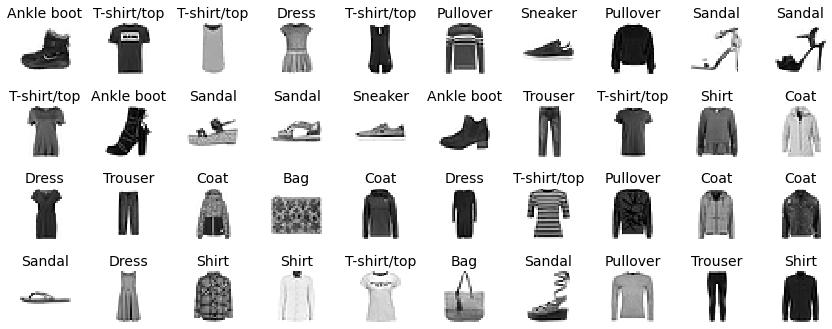

In [24]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

In [25]:
tf.random.set_seed(42) #This sets the global seed
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [26]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


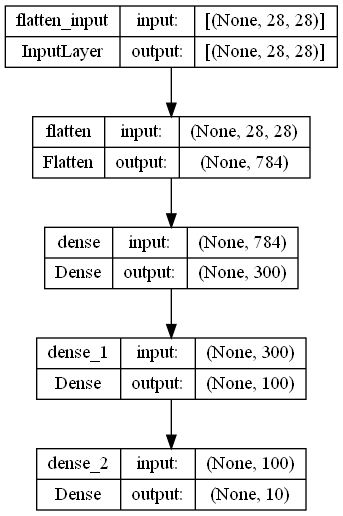

In [28]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True) #pip install pydot and download graphviz

In [29]:
model.layers

In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
model.get_layer('dense') is hidden1

True

In [32]:
weights, biases = hidden1.get_weights()
weights

array([[-0.06528362, -0.01850377, -0.0321061 , ...,  0.06902091,
         0.07383078, -0.03533939],
       [ 0.05711423,  0.04785346,  0.03871175, ...,  0.03531438,
        -0.04750034,  0.05784567],
       [-0.02435643, -0.06814568,  0.07383774, ...,  0.03029884,
         0.04029797,  0.0596607 ],
       ...,
       [ 0.0170713 ,  0.06955332,  0.0498298 , ...,  0.05468147,
        -0.03550022, -0.00434026],
       [-0.01688498, -0.02532664, -0.01054918, ..., -0.01847373,
        -0.00466573,  0.07190819],
       [ 0.02072258,  0.06047398,  0.0484298 , ...,  0.03145959,
        -0.06750156,  0.04732525]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compiling the model

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [36]:
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
# extra code – shows how to convert one-hot vectors to class ids
#np.argmax(
#    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
#     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
#    axis=1
#)

## Training and evaluating the model



In [38]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 5ms/step - loss: 0.7040 - accuracy: 0.7679 - val_loss: 0.4990 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4817 - accuracy: 0.8330 - val_loss: 0.4638 - val_accuracy: 0.8356
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4360 - accuracy: 0.8479 - val_loss: 0.4214 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4119 - accuracy: 0.8556 - val_loss: 0.3937 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3912 - accuracy: 0.8634 - val_loss: 0.3900 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3753 - accuracy: 0.8683 - val_loss: 0.4018 - val_accuracy: 0.8574
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3631 - accuracy: 0.8715 - val_loss: 0.3741 - val_accuracy

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


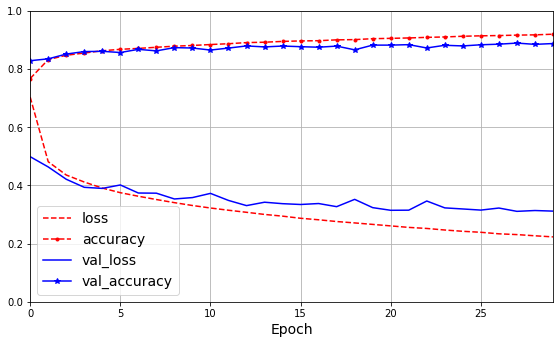

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()

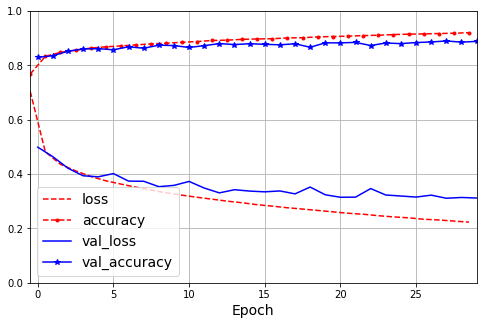

In [42]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3293 - accuracy: 0.8813


[0.3293159306049347, 0.8812999725341797]

## Using the model to make predictions

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 3s 3s/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

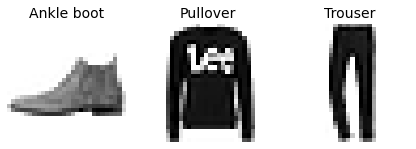

In [48]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## Building a Regression MLP Using the Sequential API

In [49]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [50]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 4s 6ms/step - loss: 0.7683 - root_mean_squared_error: 0.8765 - val_loss: 0.4250 - val_root_mean_squared_error: 0.6519
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3730 - root_mean_squared_error: 0.6107 - val_loss: 1.1550 - val_root_mean_squared_error: 1.0747
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3595 - root_mean_squared_error: 0.5996 - val_loss: 0.3679 - val_root_mean_squared_error: 0.6065
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3434 - root_mean_squared_error: 0.5860 - val_loss: 0.4597 - val_root_mean_squared_error: 0.6780
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3305 - root_mean_squared_error: 0.5749 - val_loss: 0.4737 - val_root_mean_squared_error: 0.6882
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3239 - root_mean_squared_error: 0.5692 - val_loss: 0.3124 - val_

In [51]:
rmse_test

0.530714750289917

In [52]:
y_pred

array([[0.4857082],
       [1.2036381],
       [5.2700424]], dtype=float32)

## Building Complex Models Using the Functional API

In [53]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [54]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 8)            17          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 1.2348 - root_mean_squared_error: 1.1112 - val_loss: 0.6361 - val_root_mean_squared_error: 0.7975
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4669 - root_mean_squared_error: 0.6833 - val_loss: 0.4448 - val_root_mean_squared_error: 0.6670
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4056 - root_mean_squared_error: 0.6368 - val_loss: 0.6957 - val_root_mean_squared_error: 0.8341
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3859 - root_mean_squared_error: 0.6212 - val_loss: 2.4110 - val_root_mean_squared_error: 1.5527
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3692 - root_mean_squared_error: 0.6076 - val_loss: 2.5133 - val_root_mean_squared_error: 1.5853
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3746 - root_mean_squared_error: 0.6120 - val_loss: 1.9628 - val_

In [57]:
tf.random.set_seed(42)  # extra code

In [58]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 1.6925 - root_mean_squared_error: 1.3010 - val_loss: 0.7724 - val_root_mean_squared_error: 0.8789
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5832 - root_mean_squared_error: 0.7637 - val_loss: 3.7573 - val_root_mean_squared_error: 1.9384
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5005 - root_mean_squared_error: 0.7075 - val_loss: 0.5077 - val_root_mean_squared_error: 0.7125
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4238 - root_mean_squared_error: 0.6510 - val_loss: 0.4700 - val_root_mean_squared_error: 0.6856
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3882 - root_mean_squared_error: 0.6230 - val_loss: 0.5185 - val_root_mean_squared_error: 0.7201
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3726 - root_mean_squared_error: 0.6104 - val_loss: 0.4545 - val_

In [60]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [61]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [62]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [63]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 1.5772 - dense_2_loss: 1.5476 - dense_3_loss: 1.8429 - dense_2_root_mean_squared_error: 1.2440 - dense_3_root_mean_squared_error: 1.3575 - val_loss: 1.2856 - val_dense_2_loss: 1.2686 - val_dense_3_loss: 1.4387 - val_dense_2_root_mean_squared_error: 1.1263 - val_dense_3_root_mean_squared_error: 1.1995
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5590 - dense_2_loss: 0.5378 - dense_3_loss: 0.7500 - dense_2_root_mean_squared_error: 0.7333 - dense_3_root_mean_squared_error: 0.8660 - val_loss: 1.7513 - val_dense_2_loss: 1.8698 - val_dense_3_loss: 0.6850 - val_dense_2_root_mean_squared_error: 1.3674 - val_dense_3_root_mean_squared_error: 0.8276
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4690 - dense_2_loss: 0.4528 - dense_3_loss: 0.6148 - dense_2_root_mean_squared_error: 0.6729 - dense_3_root_mean_squared_error: 0.7841 - val_loss: 0.4629 - val_dense_2_loss

In [64]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 1s 3ms/step - loss: 0.3292 - dense_2_loss: 0.3236 - dense_3_loss: 0.3799 - dense_2_root_mean_squared_error: 0.5689 - dense_3_root_mean_squared_error: 0.6164


In [65]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 210ms/step


In [66]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 59ms/step


## Using the Subclassing API to Build Dynamic Models

In [67]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [68]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 8s 7ms/step - loss: 1.6461 - output_1_loss: 1.5590 - output_2_loss: 2.4302 - output_1_root_mean_squared_error: 1.2486 - output_2_root_mean_squared_error: 1.5589 - val_loss: 3.0429 - val_output_1_loss: 0.6518 - val_output_2_loss: 24.5629 - val_output_1_root_mean_squared_error: 0.8073 - val_output_2_root_mean_squared_error: 4.9561
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5470 - output_1_loss: 0.4942 - output_2_loss: 1.0223 - output_1_root_mean_squared_error: 0.7030 - output_2_root_mean_squared_error: 1.0111 - val_loss: 1.7465 - val_output_1_loss: 0.4921 - val_output_2_loss: 13.0358 - val_output_1_root_mean_squared_error: 0.7015 - val_output_2_root_mean_squared_error: 3.6105
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4559 - output_1_loss: 0.4289 - output_2_loss: 0.6996 - output_1_root_mean_squared_error: 0.6549 - output_2_root_mean_squared_error: 0.8364 - val_loss: 1.0

## Saving and Restoring a Model

In [69]:
import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [70]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model\assets


In [71]:
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model\assets
my_keras_model\keras_metadata.pb
my_keras_model\saved_model.pb
my_keras_model\variables
my_keras_model\variables\variables.data-00000-of-00001
my_keras_model\variables\variables.index


In [72]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 206ms/step


In [73]:
model.save_weights("my_weights")

In [74]:
model.load_weights("my_weights")

In [75]:
for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.data-00000-of-00001
my_weights.index


## Using Callbacks

In [76]:
shutil.rmtree("my_checkpoints", ignore_errors=True) 

In [77]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 4s 7ms/step - loss: 0.3665 - output_1_loss: 0.3585 - output_2_loss: 0.4382 - output_1_root_mean_squared_error: 0.5987 - output_2_root_mean_squared_error: 0.6620 - val_loss: 0.3756 - val_output_1_loss: 0.3240 - val_output_2_loss: 0.8402 - val_output_1_root_mean_squared_error: 0.5692 - val_output_2_root_mean_squared_error: 0.9166
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3540 - output_1_loss: 0.3455 - output_2_loss: 0.4304 - output_1_root_mean_squared_error: 0.5878 - output_2_root_mean_squared_error: 0.6561 - val_loss: 0.5291 - val_output_1_loss: 0.5112 - val_output_2_loss: 0.6899 - val_output_1_root_mean_squared_error: 0.7150 - val_output_2_root_mean_squared_error: 0.8306
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3545 - output_1_loss: 0.3470 - output_2_loss: 0.4218 - output_1_root_mean_squared_error: 0.5891 - output_2_root_mean_squared_error: 0.6494 - val_loss: 0.426

In [78]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3337 - output_1_loss: 0.3267 - output_2_loss: 0.3967 - output_1_root_mean_squared_error: 0.5716 - output_2_root_mean_squared_error: 0.6298 - val_loss: 0.3337 - val_output_1_loss: 0.3261 - val_output_2_loss: 0.4017 - val_output_1_root_mean_squared_error: 0.5711 - val_output_2_root_mean_squared_error: 0.6338
Epoch 2/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3341 - output_1_loss: 0.3271 - output_2_loss: 0.3974 - output_1_root_mean_squared_error: 0.5719 - output_2_root_mean_squared_error: 0.6304 - val_loss: 0.3599 - val_output_1_loss: 0.3535 - val_output_2_loss: 0.4171 - val_output_1_root_mean_squared_error: 0.5946 - val_output_2_root_mean_squared_error: 0.6458
Epoch 3/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3311 - output_1_loss: 0.3244 - output_2_loss: 0.3920 - output_1_root_mean_squared_error: 0.5695 - output_2_root_mean_squared_error: 0.6261 - val_loss: 0.

In [79]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [80]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=0.94
Epoch=1, val/train=1.26
Epoch=2, val/train=1.38
Epoch=3, val/train=1.76
Epoch=4, val/train=9.11
Epoch=5, val/train=6.18
Epoch=6, val/train=2.27
Epoch=7, val/train=1.78
Epoch=8, val/train=1.24
Epoch=9, val/train=1.21


## Using TensorBoard for Visualization

In [81]:
if "google.colab" in sys.modules:  # extra code
    %pip install -q -U tensorboard-plugin-profile

In [82]:
shutil.rmtree("my_logs", ignore_errors=True)

In [83]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [84]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [85]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 2.1885 - root_mean_squared_error: 1.4794 - val_loss: 1.4639 - val_root_mean_squared_error: 1.2099
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7644 - root_mean_squared_error: 0.8743 - val_loss: 0.6417 - val_root_mean_squared_error: 0.8011
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6368 - root_mean_squared_error: 0.7980 - val_loss: 0.5736 - val_root_mean_squared_error: 0.7574
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5834 - root_mean_squared_error: 0.7638 - val_loss: 0.5360 - val_root_mean_squared_error: 0.7321
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5470 - root_mean_squared_error: 0.7396 - val_loss: 0.5060 - val_root_mean_squared_error: 0.7113
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5172 - root_mean_squared_error: 0.7191 - val_loss: 0.4849 - val_

In [86]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2022_11_20_17_04_24
    events.out.tfevents.1668974691.PC-FAUSTO.profile-empty
    plugins
      profile
        2022_11_20_20_04_51
          PC-FAUSTO.input_pipeline.pb
          PC-FAUSTO.kernel_stats.pb
          PC-FAUSTO.memory_profile.json.gz
          PC-FAUSTO.overview_page.pb
          PC-FAUSTO.tensorflow_stats.pb
          PC-FAUSTO.trace.json.gz
          PC-FAUSTO.xplane.pb
    train
      events.out.tfevents.1668974690.PC-FAUSTO.26312.0.v2
    validation
      events.out.tfevents.1668974692.PC-FAUSTO.26312.1.v2


In [87]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs


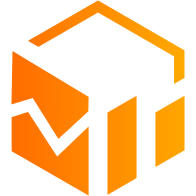
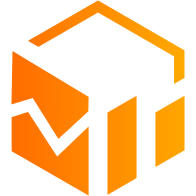

In [88]:
# extra code

if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('http://localhost:6006/'))

In [89]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


In [ ]:
if "google.colab" in sys.modules:
    !tensorboard dev upload --logdir ./my_logs --one_shot \
                            --name "Quick test" --description "This is a test" 
else:
    from tensorboard.main import run_main

    argv = "tensorboard dev upload --logdir ./my_logs --one_shot".split()
    argv += ["--name", "Quick test", "--description", "This is a test"]
    try:
        original_sys_argv_and_sys_exit = sys.argv, sys.exit
        sys.argv, sys.exit = argv, lambda status: None
        run_main()
    finally:
        sys.argv, sys.exit = original_sys_argv_and_sys_exit

In [92]:
!tensorboard dev list

https://tensorboard.dev/experiment/EPcLZWWRTwidSZIPPc31jA/
	Name                 Quick test
	Description          This is a test
	Id                   EPcLZWWRTwidSZIPPc31jA
	Created              2022-11-20 17:13:40 (1 minute ago)
	Updated              2022-11-20 17:13:47 (1 minute ago)
	Runs                 3
	Tags                 8
	Scalars              1120
	Tensor bytes         1421436
	Binary object bytes  29768


2022-11-20 17:14:42.590249: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-20 17:14:42.590309: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-20 17:14:49.844966: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-11-20 17:14:49.845041: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-20 17:14:49.858198: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: PC-Fausto
2022-11-20 17:14:49.858942: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: PC-Fausto
Total: 1 experiment(s)


In [94]:
!tensorboard dev delete --experiment_id <EPcLZWWRTwidSZIPPc31jA>

La sintaxis del comando no es correcta.
